# Simulation of Geometric Brownian Motion (GBM)

Objective: To implement a robust and efficient simulator for Geometric Brownian Motion (GBM). GBM is a foundational stochastic process used in quantitative finance, most famously as the underlying model for stock price dynamics in the Black-Scholes-Merton option pricing model.

This simulation is the first essential building block developing more complex numerical methods, such as Monte Carlo option pricers.

# 1. Mathematical Foundation

Geometric Brownian Motion describes the evolution of a variable S_t over time. Its dynamics are governed by the following stochastic Differential Equation (SDE):
$$ dS_t = \mu S_t dt + \sigma S_t dW_t $$
Where:
- S_t is the asset price at time t.
- mu is the drift coefficient, representing the expected return of the asset.
- sigma is the volatility coefficient, representing the standard deviation of the returns.
- W_t is a Wiener Process or Brownian Motion, which provides the random component of the model. The term dW_t can be though of as an infinitesimal random shock drawn from a normal distribution.

# Discretisation for Simulation

To simulate the continous process described by the SDE, we must use a discrete-time approximation. The most common method is the Euler-Maruyama scheme. For a small time step Delta t, the change in the stock price Delta S can be approximated as:
$$ \Delta S_t = S_t - S_{t-1} = \mu S_{t-1} \Delta t + \sigma S_{t-1} \sqrt{\Delta t} Z $$
Where Z is a random varibale drawn from a standard normal distribution.
Rearranging this, the price at step t is given by the price at the previous step t-1 plus the change:
$$ S_t = S_{t-1} (1 + \mu \Delta t + \sigma \sqrt{\Delta t} Z) $$
This iterative formula allows us to simulate the entire path of the asset price step-by-step.

# Python Implementation

We will now implement a vectorised GBM simulator using NumPy for efficiency. A vectorised approach calculates all paths and all time steps in large matrix operations, avoiding slow Python loops.

In [1]:
# Core data science and statistics libraries
import numpy as np
import matplotlib.pyplot as plt

# Set a professional plot style
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
def simulate_gbm(S0, mu, sigma, T, N, num_paths):
    """
    Simulates multiple paths of Geometric Brownian Motion.

    Parameters:
    - S0 (float): Initial asset price.
    - mu (float): Drift coefficient (annualized).
    - sigma (float): Volatility coefficient (annualized).
    - T (float): Time horizon in years.
    - N (int): Number of time steps in the simulation.
    - num_paths (int): The number of simulation paths to generate.

    Returns:
    - numpy.ndarray: A (N+1) x num_paths array containing the simulated asset price paths.
    """
    dt = T / N  # Time step size
    
    # Generate random shocks from a standard normal distribution
    # Z has shape (N, num_paths)
    Z = np.random.standard_normal(size=(N, num_paths))
    
    # Pre-allocate array for price paths for efficiency
    # S has shape (N+1, num_paths) to include the initial price S0
    S = np.zeros((N + 1, num_paths))
    S[0] = S0
    
    # Vectorized simulation loop
    for t in range(1, N + 1):
        S[t] = S[t-1] * (1 + mu * dt + sigma * np.sqrt(dt) * Z[t-1])
        
    return S

# 3. Simulation and Visualisation

Let's define a set of market parameters and use our function to simulate 10 potential paths for a stock price over a one-year horizon.

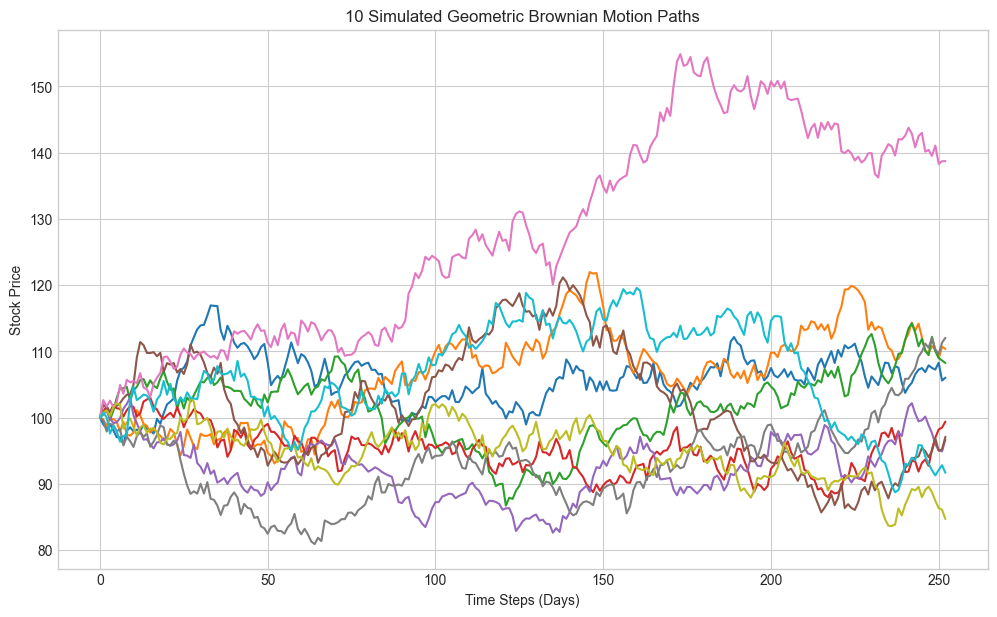

In [3]:
# --- Simulation Parameters ---
S0 = 100         # Initial stock price
mu = 0.05        # Annual drift (e.g., 5%)
sigma = 0.20     # Annual volatility (e.g., 20%)
T = 1.0          # Time horizon (1 year)
N = 252          # Number of trading days in a year (time steps)
num_paths = 10   # Number of paths to simulate

# --- Run the Simulation ---
gbm_paths = simulate_gbm(S0, mu, sigma, T, N, num_paths)

# --- Plot the Results ---
plt.figure(figsize=(12, 7))
plt.plot(gbm_paths)
plt.title(f'{num_paths} Simulated Geometric Brownian Motion Paths')
plt.xlabel(f'Time Steps (Days)')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()


# 4. Interpretation and Next Steps

The plot above clearly illustrates the stochastic nature of the asset paths generated by the GBM model. All paths start at the initial price of 100, but their sebsequent evolution is random, driven by the Wiener process.

- Role of Drift (mu): The drift term mu provides the deterministic trend to the paths. With a positive drift of 5%, we can observe a general upward tendency in the cloud of simulated paths.
- Role of Volatility (sigma): The volatility term sigma deictates the magnitude of the random flucuations around the drift. A higher volatility would result in a wider, more dispersed fan of potential paths.

# Connection to Option Pricing

This simulation is the foundational engine for a Monte Carlo Option Pricer. In that context, we will make one critical adjustment based on risk-neutral valuation theory: the drift of the stock, mu, will be replaced by the risk-free interest rate, r.

Conclusion: We have successfully built and visualised a vectorised simulator for Geometric Brownian Motion. This provides a robust foundation for the next step in our project.
Next Steps: Use this GBM simulator to build a Monte Carlo engine to price a European call option and compare the result to the analytical Black-Scholes-Merton formula